<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/Detec%C3%A7%C3%A3o_Fraudes_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Detecção de Fraudes em Cartões de Crédito

*por Rubens Gianfaldoni*

---

Fraudes envolvendo cartões de crédito mais que dobraram em 2020. De março a julho houve uma alta de 111,8%.

O número de fraudes levou o governo federal e nove entidades privadas a lançar a campanha [#FiqueEsperto]('https://fe.seg.br/').

As maiores formas de ataque verificadas nesse período foram : [phising]('https://bit.ly/2Q5Zi7W) e [engenharia social]('https://bit.ly/3usPBzr'), seguido do [golpe do falso motoboy]('https://glo.bo/3t94hmY'), que cresceu 65% na pandemia.

*fonte: [Extra Globo]('https://glo.bo/3wzQJD9')*

<p align=center>
<img src="https://cdn-images-1.medium.com/max/1000/1*HEusmKcnGBW_qaMlvg79Rw.jpeg" width="40%">

----

##Importar bibliotecas necessárias

In [3]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#visualização
sns.set_style('dark')

#criar variável para dataset
DATA_PATH = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'
credit = pd.read_csv(DATA_PATH)

##Análise dos dados

In [4]:
#exibir primeiras 7 linhas do dataset
credit.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [5]:
#últimas 7 linhas do dataset
credit.tail(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#resumo estatístico do dataset
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#exibir número de linhas e colunas
print('Linhas:\t {}'.format(credit.shape[0]))
print('Colunas: {}'.format(credit.shape[1]))

Linhas:	 284807
Colunas: 31


In [8]:
#exibir quantidade de valores ausentes
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#exibir tipos das variáveis
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
#exibir o dataset mais detalhado
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

---

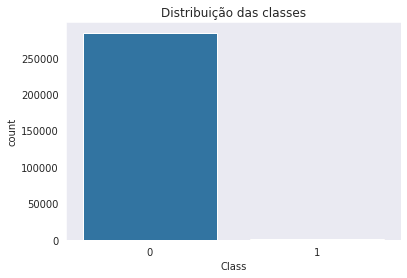

In [11]:
#plot de dataset desbalanceado
fig, ax = plt.subplots()
sns.countplot('Class', data=credit)
ax.set_title('Distribuição das classes')

plt.show()

Vamos plotar agora gráficos de histograma para mostrar as ocorrências de *Fraude* e *Normal*, levando em consideração que `Class = 1` quer dizer *Fraude* e `Class = 0` quer dizer operação *Normal*. Usaremos a variável `Time` como base.

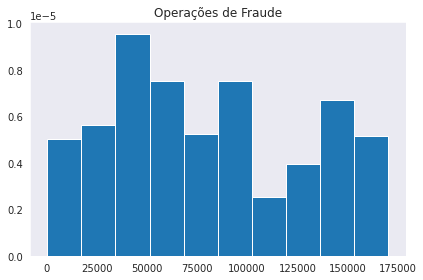

In [12]:
#histograma para Time onde Class == 1 (Fraude)
time1 = credit[credit['Class'] == 1].sort_values(by='Time', ascending=False)

fig, ax = plt.subplots()

ax.hist('Time', data=time1, density=True)
ax.set_title('Operações de Fraude')

plt.tight_layout()

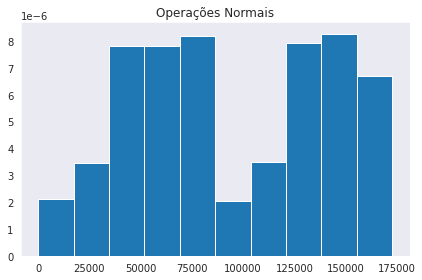

In [13]:
#histograma para Time onde Class == 0 (Normal)
time0 = credit[credit['Class'] == 0].sort_values(by='Time', ascending=False)

fig, ax = plt.subplots()

ax.hist('Time', data=time0, density=True)
ax.set_title('Operações Normais')

plt.tight_layout()

Agora usaremos a variável `Amount` como base.

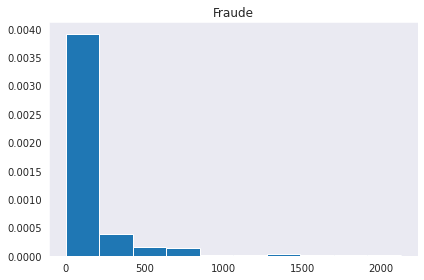

In [14]:
#histograma para Amount onde Class == 1 (Fraude)
amount1 = credit[credit['Class'] == 1].sort_values(by='Amount')

fig, ax = plt.subplots()

ax.hist('Amount', data=amount1, density=True)
ax.set_title('Fraude')

plt.tight_layout()

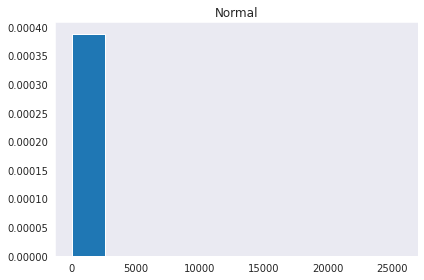

In [15]:
#histograma para Amount onde Class == 0 (Normal)
amount0 = credit[credit['Class'] == 0].sort_values(by='Amount')

fig, ax = plt.subplots()

ax.hist('Amount', data=amount0, density=True)
ax.set_title('Normal')

plt.tight_layout()

Em formato de *boxplot* abaixo, a variável `Amount` quando `Class == 1`, ou seja, houve fraude.

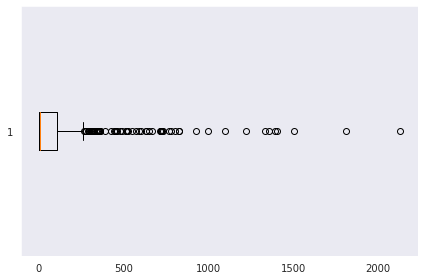

In [16]:
#boxplot para variável Amount quando Class == 1 (Fraude)
fig, ax = plt.subplots()

ax.boxplot('Amount', data=amount1, vert=False)

plt.tight_layout()

Um exemplo de matriz de correlação, onde a variável `Class = 1` relacionada com a coluna `Time`

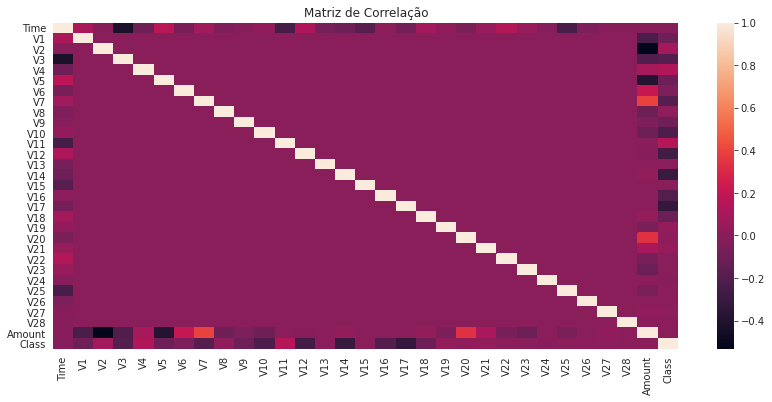

In [18]:
#matriz de correlação para o dataset 
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(credit.corr())
sns.set_style('white')
ax.set_title("Matriz de Correlação")

plt.show()

In [19]:
#porcentagem de fraudes do dataset original  
print("\n{:.2f}% são fraudes, de acordo com o dataset.\n".format((credit[credit.Class == 1].shape[0] / credit.shape[0]) * 100))


0.17% são fraudes, de acordo com o dataset.



Até agora conseguimos avaliar os seguintes pontos:

*   a ausência de dados nulos denota um `dataset` desbalanceado
*   colunas `Time` e `Amount` precisam ser normalizadas
*com apenas *0,17%* de fraudes, é outro indício de `dataset` desbalanceado






---

###Preparando os dados para o modelo de *Machine Learning*

**Normalizando dos dados**

Vamos pegar a variável `Time` e torná-la uma coluna alvo, dependente do resultado das outras colunas e comparar antes e depois.

In [20]:
#tamanho das linhas e colunas para variável Time
X = credit.drop('Time', axis=1)
y = credit.Time

print("credit.shape:\t{}".format(credit.shape))
print("X.shape:\t{}".format(X.shape))
print("y.shape:\t{}".format(y.shape))

credit.shape:	(284807, 31)
X.shape:	(284807, 30)
y.shape:	(284807,)


Agora a coluna `Amount`, e fazer a mesma coisa.

In [21]:
#tamanho das linhas e colunas para variável Amount
X2 = credit.drop('Amount', axis=1)
y2 = credit.Time

print("credit.shape:\t{}".format(credit.shape))
print("X2.shape:\t{}".format(X2.shape))
print("y2.shape:\t{}".format(y2.shape))

credit.shape:	(284807, 31)
X2.shape:	(284807, 30)
y2.shape:	(284807,)


**Padronizando os dados**

Vamos criar 2 variáveis novas e eliminar as variáveis que usaremos de alvo para as demais, no caso `Time` e `Amount`

In [22]:
#padronizar dados criando novas variáveis
new_credit = credit.copy()

new_scaler = StandardScaler()

new_credit['new_amount'] = new_scaler.fit_transform(new_credit['Amount'].values.reshape(-1, 1))
new_credit['new_time'] = new_scaler.fit_transform(new_credit['Time'].values.reshape(-1, 1))

new_credit.drop(['Time', 'Amount'], axis=1, inplace=True)

E o novo `dataset` fica assim:

In [23]:
#novo dataset padronizado
new_credit.head(7)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,new_amount,new_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556,-1.996541
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279,-1.996499


Vamos começar a separar os eixos X e Y, a fim de iniciar o treino e teste.

In [24]:
#criar modelo treino e teste
X = new_credit.drop('Class', axis=1)
y = credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

###Balanceando os dados

In [25]:
#import de biblioteca para balancear dados
from imblearn.under_sampling import RandomUnderSampler

In [26]:
#criar variável para balancear dados de treino e teste
balance = RandomUnderSampler()

X_balance, y_balance = balance.fit_sample(X_train, y_train)

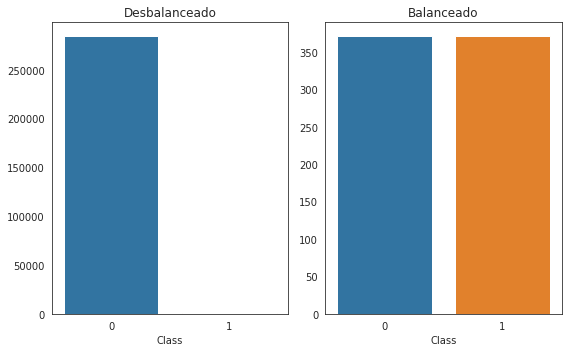

In [27]:
#countplot dos dados antes e depois do balanceamento
bl1 = credit['Class']
bl2 = y_balance

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8, 5))

sns.countplot(bl1, ax=ax[0])
ax[0].set_title('Desbalanceado')
ax[0].set_ylabel('')

sns.countplot(bl2, ax=ax[1])
ax[1].set_title('Balanceado')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('')

plt.tight_layout()

In [28]:
#exibir dados das linhas balanceadas
print(pd.Series(y_balance).value_counts())

1    371
0    371
dtype: int64


##Modelos de classificação

Vamos garantir uma proporção 75/25 para o conjunto de treino e teste.

Vamos criar os modelos de treino e previsões.

In [49]:
#criar modelo treino e teste para 75/25
X = new_credit.drop('Class', axis=1)
y = credit['Class']

X_balance, X_test, y_balance, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
#modelos para classificação 75/25, dados balanceados
model = LogisticRegression()

model.fit(X_balance, y_balance)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [51]:
#relatório de classificação 75/25
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     71082
           1      0.835     0.592     0.693       120

    accuracy                          0.999     71202
   macro avg      0.917     0.796     0.846     71202
weighted avg      0.999     0.999     0.999     71202



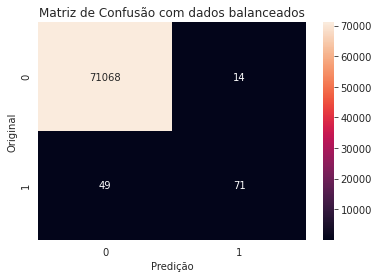

In [52]:
#matriz de confusão para modelo 75/25
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='')

ax.set_title("Matriz de Confusão com dados balanceados")
ax.set_ylabel("Original")
ax.set_xlabel("Predição")

plt.show()

In [53]:
#acurácia do modelo criado
print('Acurácia: {:.2%}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 99.91%


In [34]:
#bibliotecas pipeline e cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [55]:
#criando um pipeline para ajudar na comparação das classes
model = make_pipeline(StandardScaler(), LogisticRegression())
result = cross_val_score(model, 
          X_balance,
          y_balance, 
          cv=5, 
          scoring='recall'
          )

print('Scores:', result) 
print('Recall: %0.2f (+/- %0.2f)' % (result.mean(), result.std() * 2))

Scores: [0.7027027  0.59459459 0.58108108 0.61333333 0.65333333]
Recall: 0.63 ( +/- 0.09)


In [36]:
#biblioteca Gridsearch
from sklearn.model_selection import GridSearchCV

In [56]:
#usando gridsearch para procurar melhor métrica do modelo
model = LogisticRegression()

X = new_credit.drop('Class', axis=1)
y = credit['Class']

X_balance, X_test, y_balance, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_balance)
X_train_transformed = scaler.transform(X_balance)

parameters = {'C': [0.0001, 0.001, 0.1, 1, 10, 100]}

clf = GridSearchCV(model, parameters)
clf.fit(X_train_transformed, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
#melhor métrica de acordo com o modelo
print(clf.best_params_)

{'C': 0.0001}


In [65]:
#exibir métricas calculadas pelo modelo
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%03f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

0.998324 (+/-0.000) for {'C': 0.0001}
0.998324 (+/-0.000) for {'C': 0.001}
0.998324 (+/-0.000) for {'C': 0.1}
0.998324 (+/-0.000) for {'C': 1}
0.998324 (+/-0.000) for {'C': 10}
0.998324 (+/-0.000) for {'C': 100}


In [58]:
#cálculos obtidos pelo modelo
clf.cv_results_

{'mean_fit_time': array([0.61987495, 0.59480147, 0.93897471, 1.02939806, 1.32043424,
        1.52127037]),
 'mean_score_time': array([0.00765505, 0.00766335, 0.00776725, 0.00799332, 0.00756626,
        0.00790248]),
 'mean_test_score': array([0.99832401, 0.99832401, 0.99832401, 0.99832401, 0.99832401,
        0.99832401]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([0.99833805, 0.99833805, 0.99833805, 0.99833805, 0.99833805,
        0.99833805]),
 'split1_test_score': array([0.99833805, 0.99833805, 0.99833805, 0.99833805, 0.99833805,
        0.99833805]),
 'split2_test_score': array([0.99831465, 0.99831465, 0.99831465, 0.99831465, 0.99831465,
        0.99831465]),
 'spli

In [59]:
print('Recall: {:.2%} e melhor parâmetro foi: {}'.format(clf.best_score_, clf.best_params_))

Recall: 99.83% e melhor parâmetro foi: {'C': 0.0001}


##Conclusão

Em um modelo desbalanceado as chances de ocorrer um erro é muito grande, visto a discrepância do primeiro gráfico em relação a variável `Class`.
Com algumas bibliotecas muito poderosas como Pipeline Gridsearch, conseguimos chegar em uma acurácia alta e métrica *Recall* alta.

O importante de analisar esse tipo de `dataset` é obter o menor número de falsos positivos possível, pois isso acarreta em muitos problemas para o cliente do cartão, como por exemplo um bloqueio parcial do cartão de crédito por uma compra que o algoritmo não analisou corretamente.

Acertar uma avaliação de risco de fraude é bem complexo, e por isso é uma das grandes buscas pelas operardoras de crédito.





